# Turing Machine and Deep Learning

## Assignment 1: Preliminaries

This notebook is meant for you to review some mathematics to help your intuition when dealing with more complex models, and some hands on practice with `numpy` and `matplotlib` to review some programming skills. It also introduces you to some common ML lingo. This notebook must be in your GitHub directory by the deadline mentioned on Canvas.

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a GitHub repository (this will be where you submit *all* homework assignments). Share the public link to this repository with us via
2. Create a folder called "Week 1" and copy this notebook and any other files or data that may be needed.
3. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Grading is based on effort and you can either obtain a pass or fail for the assignment.

## Question 1.1 -- Regression as minimization

Derive the closed form solution for ***a*** in a 1-dimensional linear regression as states as an optimization (minimization) problem. You may upload a handwritten scan/photograph, a screenshot of a text editor, or LaTeX notation directly.

- *Given*: $n$ input-output pairs of the form $$(x_i, y_i)$$
- *To find*: The coefficients of the line of best fit $$\hat{y_i} = a+bx_i$$
- *Loss function*: The sum of squared errors: $$f(Y, \hat{Y})=\sum_{i=0}^{n}(y_i-\hat{y}_i)^2$$
- ***b*** is found by taking partial derivates with respect to ***b*** and setting it to zero. This gives $$ b = \frac{\sum_{i=0}^{n}(x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=0}^{n}(x_i - \bar{x})^2} $$
Note that in general, loss functions are the distance function *averaged over all data points in the set*. For now, you can ignore this point.

*Hint: Treat this as a regular minimization problem. Find where the partial derivates are zero of the error are with respect to the variables you wish to find.*

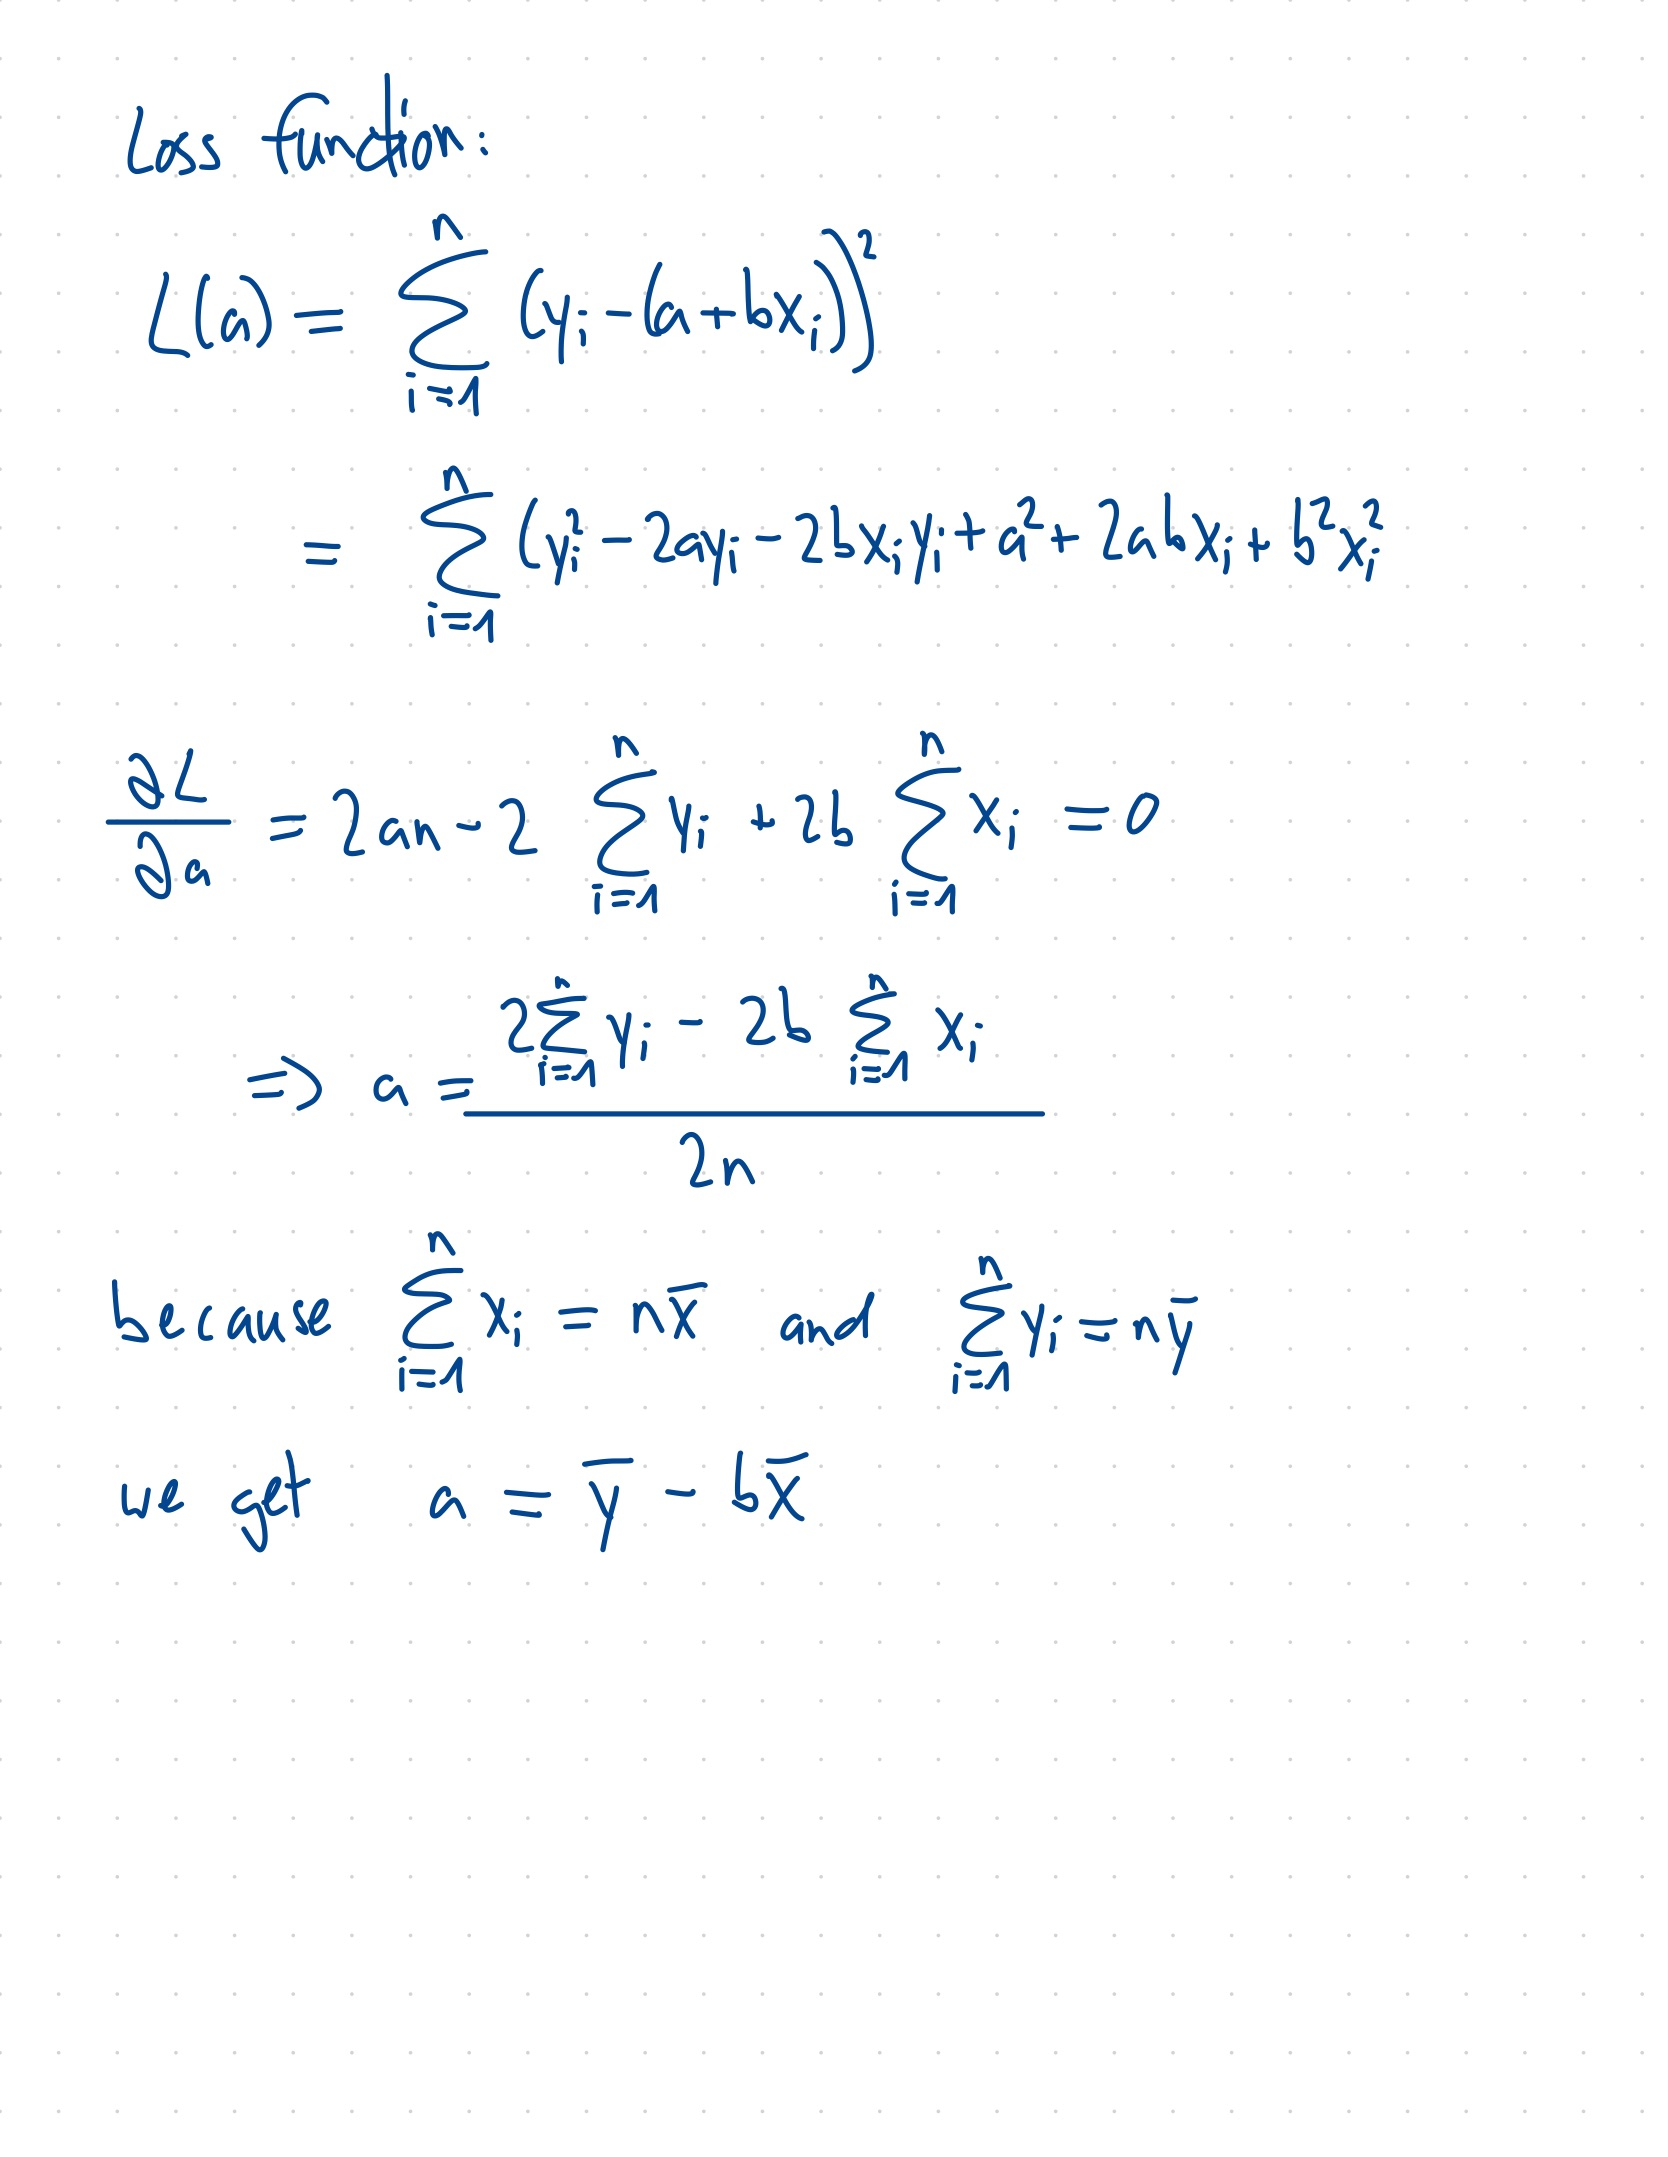

## Question 1.2 -- Function analysis

Is there only one unique solution for $a$ and $b$? Why/why not?

*Hint: Think of the shape of the loss function, a.k.a. the 'loss landscape'.*

Yes there is only one unique solution for a and b because the loss function has a convex shape with only one global minimum.

Would the solutions for $a$ and $b$ be different if you used mean squared error instead of sum of squared errors? Why?

No because MSE only changes the scale of the error, but not the minimum or uniqueness of the minimum point

## Question 2.1 -- Function generation

Write a function that takes as input a list of floats $x_i$ to and outputs a list of the form:
$$y_i=sin(x_i)+\eta_i$$
where $\eta_i$ is normally sampled noise with a small standard deviation $\epsilon$:
$$\eta_i \sim \mathcal{N}(0, \epsilon)$$

Now, to see your work, plot it!
- Sample 20 equally-spaced points from the range $x\in [0,\pi/4]$ (cf. numpy's `linspace` function).
- Set $\epsilon=0.1$
- Sample y-values from your function using the noisy formula above.
- Plot this as a scatter plot.
- For reference, plot the function $y_i=sin(x_i)$ (no noise).
- Don't forget to add labels, a legend and other information.
- Optional Tip: Set a random seed (np.random.seed) to ensure reproducability of your results.

---


Your results should look something like this:
![image.png](attachment:image.png)

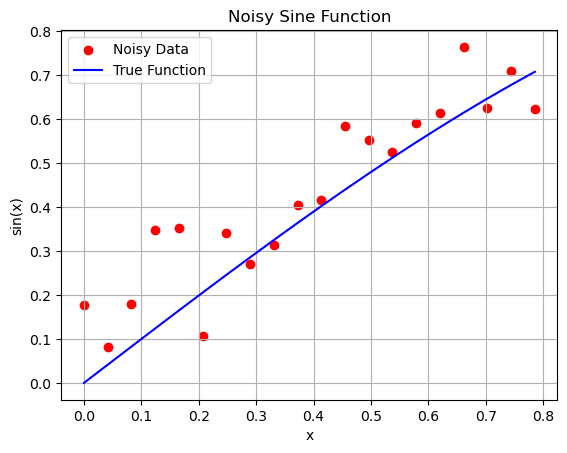

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Setting a random seed for reproducibility
np.random.seed(0)

#generate sinus function with noise
def generate_sin(x, epsilon):
    noise = np.random.normal(0, epsilon, len(x))
    func = np.sin(x) + noise
    return func

n_samples = 20
epsilon = 0.1

# Sample 20 equally spaced points
x = np.linspace(0, np.pi/4, n_samples)

# Create y-values
y = generate_sin(x, epsilon)

# Create the true function values (without noise)
x_pure = np.linspace(0, np.pi/4, n_samples)  
y_pure = np.sin(x_pure)

# Plot the data
plt.scatter(x, y, label='Noisy Data', color='red')

# Plot the true sinus function
plt.plot(x_pure, y_pure, label='True Function', color='blue')

# Add grid, legend, and labels 
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Noisy Sine Function')
plt.show()

## Question 2.2 -- Implementation of Linear Regression

Write a function that takes as input a list of $(x,y)$ pairs and returns the coefficients and residuals for a linear regression. Specifically, use the formula for $a$ and $b$ you found in Question 1.1.

*Hint: It may be better to create a new function that computes the sum of squared errors separately, taking $a$, $b$, and the $(x,y)$ pairs as inputs, and outputting a single float value.*

Compute and plot the line of best fit, along with the data and true function as you did above. Also print out the coefficients and the residuals (sum of square errors). How does this line compare to the true function?

---

You should get something similar to this:

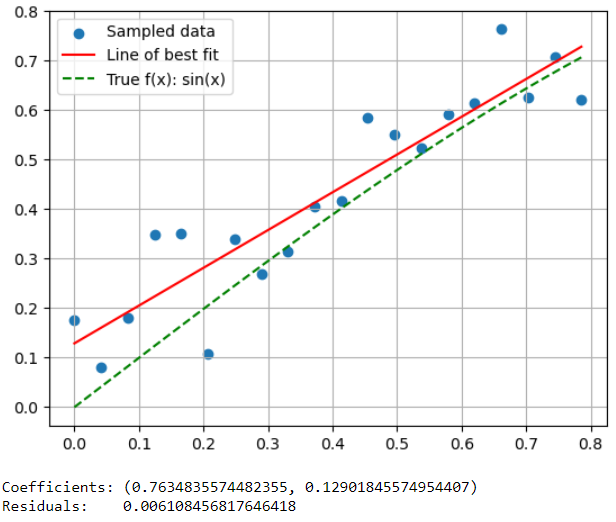

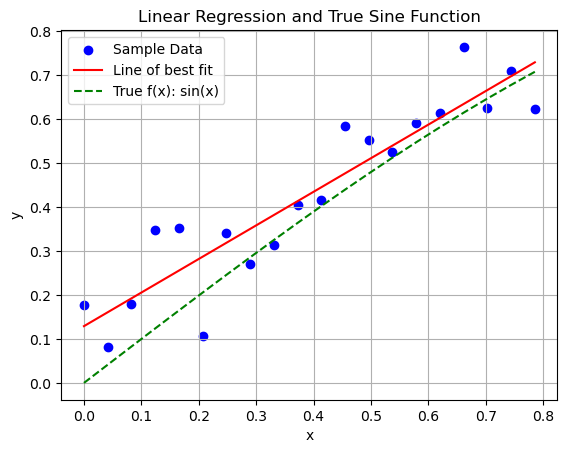

Coefficients: (0.12901845574954413, 0.7634835574482354)
Residuals:    0.1221691363529284


In [10]:
np.random.seed(0)

# sum of squares of residuals
def compute_sos(y_true, y_pred):
    sos = np.sum((y_true -y_pred)**2)
    return sos

# linear regression
def lin_reg(xs, ys):
    x_mean = np.mean(xs)
    y_mean = np.mean(ys)
    
    b = np.sum((xs-x_mean)*(ys-y_mean)/(np.sum((xs-x_mean)**2)))
    a = y_mean - b * x_mean
    
    y_pred = a + b * xs
    
    res = compute_sos(ys,y_pred)
    
    return a, b, res


#create evenly spaced x value and noisy y values
xs = np.linspace(0, np.pi/4, n_samples)  
ys = np.sin(xs) + np.random.normal(0, 0.1, n_samples)

# generate line of best fit
a, b, res = lin_reg(xs,ys)

y_best = a + b * xs


# True function
x_true  = np.linspace(0, np.pi/4, n_samples)  
y_true = np.sin(xs)

# plot line of best fit, sample data and true function
plt.scatter(xs,ys, label = "Sample Data", color = "blue")
plt.plot(xs, y_best,"r", label = "Line of best fit")
plt.plot(x_true,y_true, "g--", label = "True f(x): sin(x)")

# make it pretty
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression and True Sine Function')
plt.grid(True)
plt.legend()
plt.show()
 
print("Coefficients:", (a, b))
print("Residuals:   ", res)


## Question 2.3 -- Comparison to existing model

Use numpy's `polyfit` functions to get the coefficients and residuals of the same data points. Plot a line using these coefficients, and plot the sampled data, your previous line of best fit, and the true function, as before, for reference. How does this compare to the function you derived for $a$ and $b$? Print out the values for $a$, $b$ and the residuals to compare them. What does this tell you about the way `polyfit` is implemented?

*Tip: Use a dashed/dotted line for the new function to make the comparison easier.*

*General tip: Don't overwrite your previous variables!*

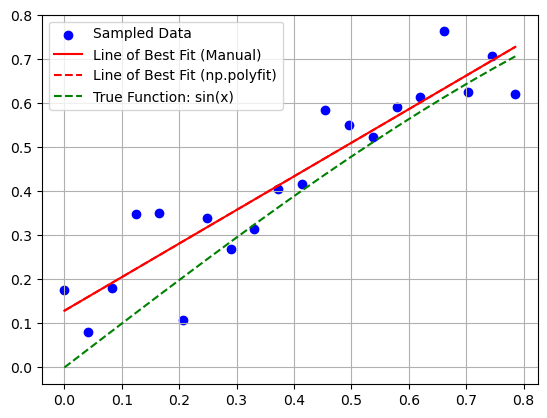

Coefficients:      (0.12901845574954413, 0.7634835574482354)
Residuals:         0.1221691363529284
Coefficients (np): (0.1290184557495442, 0.7634835574482354)
Residuals (np):    [0.12216914]


In [11]:
# using xs and ys as sample data again

#getting the coefficients and the residual value
coefficients, residuals, _, _, _ = np.polyfit(xs,ys,1, full = True)

b_np, a_np = coefficients

y_best_np = np.poly1d(coefficients)(xs)

# Plot the sampled data points
plt.scatter(xs, ys, color='blue', label='Sampled Data')

# Plot the previous line of best fit for comparison
plt.plot(xs, y_best, 'r', label='Line of Best Fit (Manual)')

# Plot the line of best fit
plt.plot(xs, y_best_np, 'r--', label='Line of Best Fit (np.polyfit)')

# Plot the true sinus function 

plt.plot(x_true, y_true, 'g--', label='True Function: sin(x)')
plt.grid(True)
plt.legend()
plt.show()

# Print out coefficients and residuals from both methods
print("Coefficients:     ", (a, b))
print("Residuals:        ", res)
print("Coefficients (np):", (a_np, b_np))
print("Residuals (np):   ", residuals)


*The coefficients and residuals of both methods are identical, resulting in the graphs overlapping.Therefore polyfit is implemented in a similar way to how we derived the line of best fit in 2.2.*


## Question 3 -- Test vs train loss

The mean of the residuals you computed above are often called the *training loss* or *training error* in machine learning lingo. In general, this phrase translates to the loss (difference between observed and predicted $y$ values in whatever metric you wish) over all data points available for you to train on (your *train/train set*). In our case, the 'metric' is the function you minimized, i.e. sum of squared errors.

In real life, you generally do not generate these data points -- you observe them from your experiments. However, you would want for your model to perform well on points that were *not* used to train your model as well -- this is called *generalization*. Thus, to test this, we use a *test set* -- a series of new observations. This will become important in following weeks when we use more complex models.

In general, we would want our test and train sets to have the same distributional properties, including the underlying function and the distribution of noise. Thus, for now, we *generate* a test set and see how our models 'perform' on it (again, we generally do not have access to the underlying function to generate datapoints with, we observe them through experiments). We compute the *test loss* or *test error* using the same metric as the training error (i.e. sum of square errors in this case).

Thus, for this exercise:
- Generate a new set of x-values in the range of $x\in[0,\pi/4]$. Compute a series of y-values using your `generate_sin` function, using the same $\epsilon$ and $n$ as before.
- Rewrite the function that computes the residuals to now compute the *mean* of the residuals. Thus, our loss function is the Mean Squared Error:
$$MSE = \frac{1}{N} \sum_{i=0}^{n}(y_i-\hat{y_i})^2$$
- Make a scatter plot of the train set and test set, and plot the two lines of best fit and the true function computed earlier on the train set. Don't forget labels. Does this seem to be of a similar distribution of the train set?
- Compute and print out the training and test losses.

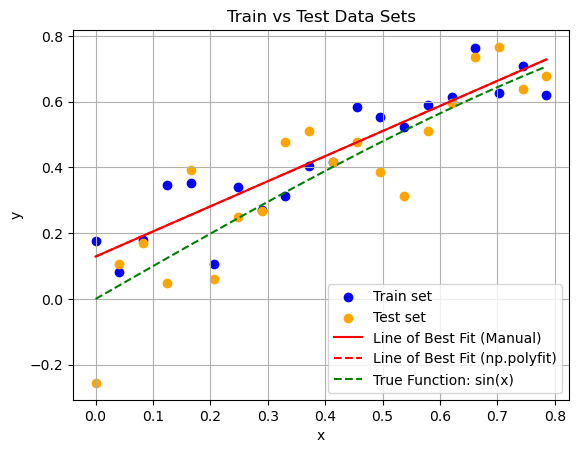

Coefficients:  (0.12901845574954413, 0.7634835574482354)
Train loss:    0.00610845681764642
Test loss:     0.01893049185927348


In [12]:
n_samples = 20
epsilon = 0.1

#Compute MSE
def compute_mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

# make a new set of x values and y values
x_test = np.linspace(0, np.pi/4, n_samples)
y_test = generate_sin(x_test, epsilon)

# Scatter plot of training set
plt.scatter(xs, ys, label="Train set", color='blue')

# Scatter plot of test set
plt.scatter(x_test, y_test, label="Test set", color='orange')

# Plot lines of best fit
plt.plot(xs, y_best, 'r', label='Line of Best Fit (Manual)')
plt.plot(xs, y_best_np, 'r--', label='Line of Best Fit (np.polyfit)')

# Plot true function
plt.plot(x_true, y_true, 'g--', label='True Function: sin(x)')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Train vs Test Data Sets')
plt.grid(True)
plt.legend()
plt.show()

# training and test losses
test_loss = compute_mse(y_test, a + b * x_test)
train_loss = compute_mse(ys, y_best)

print("Coefficients: ", (a, b))
print("Train loss:   ", train_loss)
print("Test loss:    ", test_loss)

Which of the two losses *should* be better? Which is actually better? Why?

*the training loss should be better (lower) beacuse the model is optimized on that data. In this case that is true. The training loss is lower than the test loss, so the model fits the training data well. The test loss is still decent but not as strong as the train loss. This is due to overfitting to the training data.*

## Question 4 -- Ablation study of sampling

Try out different values of $n$ and $\epsilon$. How does each one affect the performance of your linear models? (report your steps and general observations both for the train and test sets).

*Higher n should lead to lower train loss as it fits the model better,
however train loss stays 0.009 even with different n_samples 
(not sure why). 
In theory a lower n could lead to a higher training loss as the data
is not able to represent the trend effectively.
A higher epsilon means more variability in the data set, 
making it harder for the model to fit the data accurately.
This would increase the test and training loss in theory. 
A lower epsilon would mean that the data points are closer to 
the true function and therefore easier to be fit by the model.*

## Question 5.1 -- More data

Generate a training and test set using the `generate_sin` function you defined, but in the range $x\in[0,2\pi]$, $n=20$ and $\epsilon=0.2$. Plot the train and test sets (scatter plots) and true function in one plot.

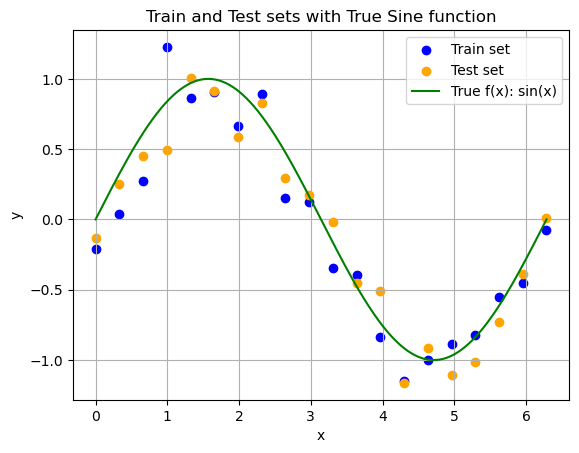

In [5]:
# TODO: generate new data and plot
n_samples = 20
epsilon = 0.2

#train and test values
x_train = np.linspace(0, np.pi*2, n_samples)
y_train = generate_sin(x_train, epsilon)
x_test = np.linspace(0, np.pi*2, n_samples)
y_test = generate_sin(x_test, epsilon)

#true sinus function values
x_pure = np.linspace(0, np.pi*2, 1000)
y_pure = np.sin(x_pure)

#plot everything
plt.scatter(x_train, y_train, color ="blue" , label="Train set")
plt.scatter(x_test, y_test, color = "orange" , label="Test set")
plt.plot(x_pure, y_pure, "g" , label = "True f(x): sin(x)")

plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Train and Test sets with True Sine function")
plt.show()

## Question 5.2 -- Polynomial fitting

Now, we examine the flexibility of the model we use and the performance on the training and test sets. 'Flexibility' is generally ill-defined, but intuitively, *a learning algorithm $A$ is more flexible than another learning algorithm $B$ if $A$ can fit its computed models $\hat{f}$ more closely to the training data than $B$ can do.* (quote from Jaeger, 2022, pg 11). For example, a quadratic function is more flexible (in theory) than a linear one, since a quadratic function can model data *at least* as well as linear ones. Specifically, the set of all linear functions is a subset of quadratic ones (by setting the quadratic coefficient to zero).

- Using the datapoints you made above with $x\in[0,2\pi]$, compute the best fitting polynomials from degrees $d\in\{1,...,20\}$.
- Save the corresponding train and test losses, and the resulting coefficients. Don't forget to change the function that computes the mean squared errors if required (perhaps `np.polyval` may help here?). Also, don't forget to create your model based _only_ on your train set.

In [6]:
#Lists to store the values in
train_losses = []
test_losses = []
all_coefficients = []

#loop for all degrees

for d in range (1, 21):
    coefficients = np.polyfit(x_train, y_train, d)
    y_train_pred = np.polyval(coefficients, x_train)
    y_test_pred = np.polyval(coefficients, x_test)
    
    # calculate MSE 
    train_loss = compute_mse(y_train, y_train_pred)
    test_loss = compute_mse(y_test, y_test_pred)
    
    
    # store the values in the lists
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    all_coefficients.append(coefficients)
print("train_losses",train_losses)
print("test_losses",test_losses)
print("all_coefficients", all_coefficients)

train_losses [0.2757040981971911, 0.2754206572975514, 0.03525970467706754, 0.03259625838500455, 0.025820029068289417, 0.02529927270053401, 0.02486546929379218, 0.020681449308710426, 0.02066839840227939, 0.020640780158683966, 0.02017784685553723, 0.016427964022913785, 0.008391446267986494, 0.008368194999331353, 0.008220125892817213, 0.007460781421860754, 0.007253054381843748, 0.007373626162520817, 0.0048943681124619795, 0.005265473503806297]
test_losses [0.23761373563882332, 0.236761640631478, 0.021889584154041027, 0.03024208971066996, 0.028961857705283284, 0.0300440901835863, 0.029997192145461083, 0.035321284782405885, 0.03553963866916941, 0.03527530455057217, 0.035768931759666736, 0.04101665666086383, 0.05022045571515639, 0.05079206312396741, 0.051902516385067474, 0.05228728155336295, 0.05288285444438275, 0.05283140662441642, 0.046397289478636965, 0.046718482298159204]
all_coefficients [array([-0.23822792,  0.66939848]), array([-0.00519614, -0.20557961,  0.63700868]), array([ 0.091228

/Users/tomsagasser/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/tomsagasser/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/tomsagasser/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


**Bonus**: You may encounter this warning (if you don't, try increasing the range of polynomial degrees):

`RankWarning: Polyfit may be poorly conditioned`

What does this mean?

*This warning is related to us trying to fit high degree polynomials (20) and results in potential numerical instability. This is probably because of the the high polinomial degree relative to the number of data points*

## Question 5.3 -- Analysis
Plot the lines of best fit for $d=\{1,2,3,5,10,20\}$. These should look like the plots shown in Lecture 1 under section *Polynomial Regression*. You may also show this in multiple plots as long as you have the reference plots for each (the train and test data and the true underlying function).

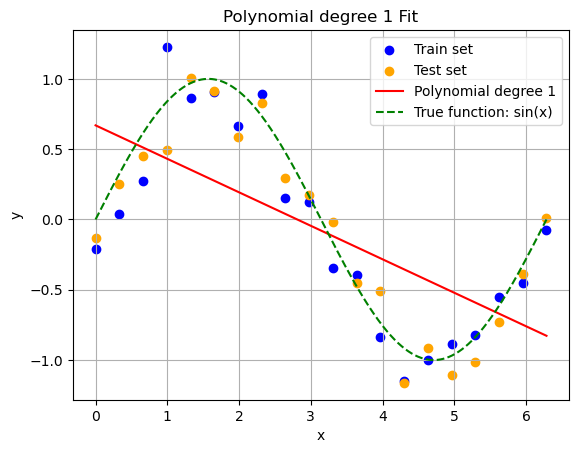

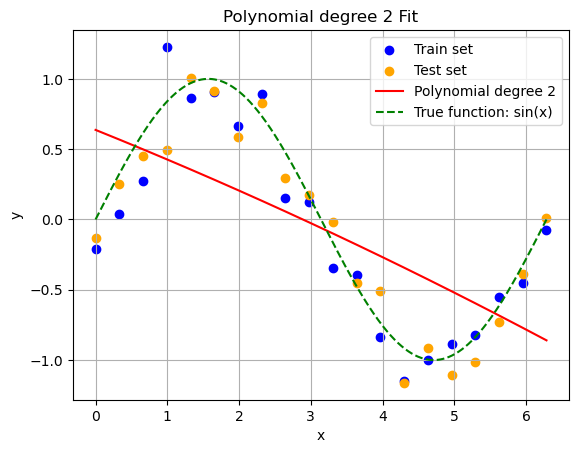

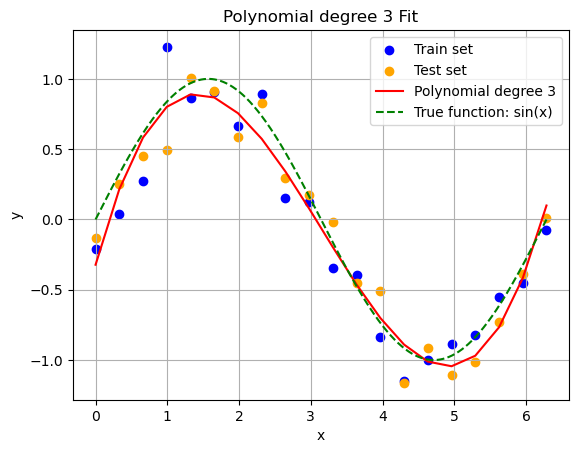

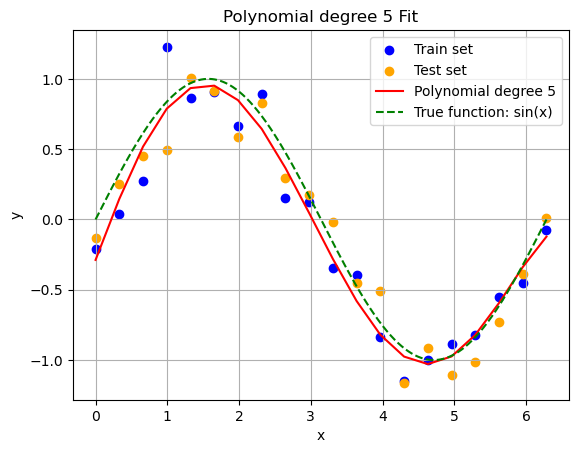

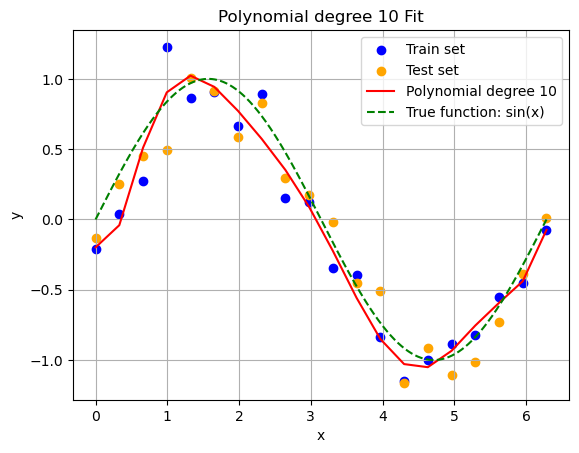

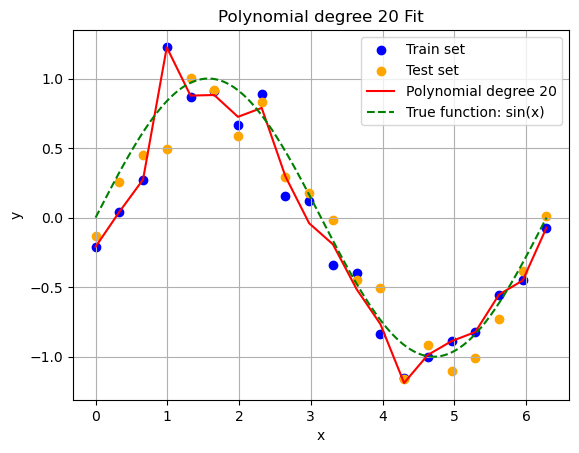

In [7]:
degrees = [1,2,3,5,10,20]

for d in degrees:
    # get coefficients for current degree and y values 
    coefficients = all_coefficients[d-1] # list starts at [0]
    y_train_fit = np.polyval(coefficients, x_train)
    y_test_fit = np.polyval(coefficients, x_test)
    
    #scatter plots
    plt.scatter(x_train, y_train, label = "Train set", color = "blue")
    plt.scatter(x_test, y_test, label = "Test set" , color = "orange")
    
    #fitted polynomial lines
    plt.plot(x_train, y_train_fit, "r", label =f"Polynomial degree {d}")
    # true function
    plt.plot(x_pure, y_pure, "g--", label = "True function: sin(x)")
    
    #plotting
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Polynomial degree {d} Fit")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print()

Now plot the MSE losses versus the flexibility (degree of the best fitting functions) for both the test and train sets. Again, a similar plot can be found in Lecture 1 under *Overfitting and Underfitting*.

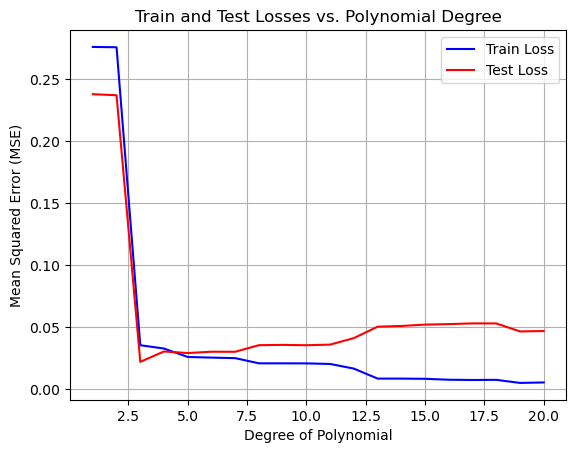

In [13]:
degrees = range(1, 21)
#plotting the train and test losses
plt.plot(degrees, train_losses, label='Train Loss', color='blue')
plt.plot(degrees, test_losses, label='Test Loss', color='red')

plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Train and Test Losses vs. Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()


## Open Questions (Question 6)
1. Where do the polynomial models start to overfit? How can you tell?
2. What model fits the best to the training data? What model fits the best to the underlying function (visually, according to your intuition about the plots)? Are they the same?
4. Try increasing the number of training points to $n=200$. At what point does overfitting start now?
5. In general, does increasing the number of training points always allow for more flexible models of the real world? Why/why not?


1. around degree 7, as that is the point where the train loss decreases more and more (the model fits the training data increasingly well) and the test loss increases more and more (the models predictions for unseen data worsens. However this depends a lot on the randomized data. if not keepen constant this varies a lot as well.

2. degree 20 fits the training data the best, as it minimizes the train loss. The best model for the underlying function would be the one closest to the original true function. intuitively i would still go with degree 20 in this case, however this does not always need to be the case.

3. overfitting now starts a lot later, as it cannot even be seen on the graph of degree 20. 

4. usually yes, if the additional data is good and not very variable (noisy).